<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Importer_Risk_Prediction/Gradient_Boost_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing the Relevant Libraries**

In [1380]:
# Installing the relevant libraries - XGBoost
!pip install xgboost

In [1381]:
# Installing the relevant libraries - XAI
!pip install lime
!pip install shap

# **Importing the Necessary Libraries**

In [1382]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import shap
import lime
import pickle
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# **Loading the Dataset**

In [1383]:
# Loading the Dataset
data = pd.read_excel("/content/drive/MyDrive/risk-prediction/Dataset/expanded_chemical_import_risk_data.xlsx")

In [1384]:
# Displaying the Dataset Head
data.head()

,Importer_ID,Import_Frequency,Import_Quantity (kg),Chemical_Name,HS Code,Country_of_Origin,Importation_Description,Compliance_History,Past_Violations,Financial_Stability,Risk_Category
0,IMP001,36,5199,"Fluorides; fluorosilicates, fluoroaluminates, ...",282619,Pakistan,Used in aluminum smelting & glass manufacturing,Excellent,4,High,Risky
1,IMP002,26,3398,Sulphuric acid; oleum,280700,Brazil,Petroleum refining & chemical synthesis,Poor,1,High,Not Risky
2,IMP003,47,5626,Sulphuric acid; oleum,280700,India,Petroleum refining & chemical synthesis,Average,5,Medium,Risky
3,IMP004,91,7700,Cyanides and cyanide oxides: Of sodium,283711,India,Gold mining & electroplating industry,Excellent,4,Medium,Not Risky
4,IMP005,63,8377,Nitric acid; sulphonitric acids,280800,China,Used in fertilizer manufacturing & explosives ...,Average,4,Low,Not Risky


# **Exploratory Data Analysis**

In [1385]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Importer_ID              400 non-null    object
 1   Import_Frequency         400 non-null    int64 
 2   Import_Quantity (kg)     400 non-null    int64 
 3   Chemical_Name            400 non-null    object
 4   HS Code                  400 non-null    int64 
 5   Country_of_Origin        400 non-null    object
 6   Importation_Description  400 non-null    object
 7   Compliance_History       400 non-null    object
 8   Past_Violations          400 non-null    int64 
 9   Financial_Stability      400 non-null    object
 10  Risk_Category            400 non-null    object
dtypes: int64(4), object(7)
memory usage: 34.5+ KB


### **Identifying Categorical and Numerical Columns**

In [1386]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

## **Categorical Features**

In [1387]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(data[categorical_features].dtypes)

Categorical Features:
- Importer_ID
- Chemical_Name
- Country_of_Origin
- Importation_Description
- Compliance_History
- Financial_Stability
- Risk_Category

Data Type of Categorical Features:
Importer_ID                object
Chemical_Name              object
Country_of_Origin          object
Importation_Description    object
Compliance_History         object
Financial_Stability        object
Risk_Category              object
dtype: object


In [1388]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Importer_ID              400 non-null    object
 1   Import_Frequency         400 non-null    int64 
 2   Import_Quantity (kg)     400 non-null    int64 
 3   Chemical_Name            400 non-null    object
 4   HS Code                  400 non-null    int64 
 5   Country_of_Origin        400 non-null    object
 6   Importation_Description  400 non-null    object
 7   Compliance_History       400 non-null    object
 8   Past_Violations          400 non-null    int64 
 9   Financial_Stability      400 non-null    object
 10  Risk_Category            400 non-null    object
dtypes: int64(4), object(7)
memory usage: 34.5+ KB


In [1389]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

Importer_ID
IMP001    1
IMP264    1
IMP274    1
IMP273    1
IMP272    1
         ..
IMP131    1
IMP130    1
IMP129    1
IMP128    1
IMP400    1
Name: count, Length: 400, dtype: int64
 
Chemical_Name
Bromine                                                                           45
Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts    40
Chlorine                                                                          39
Cyanides and cyanide oxides: Of sodium                                            35
Iodine                                                                            34
Chlorates and perchlorates; bromates and perbromates; iodates and periodates      32
Cyanides and cyanide oxides: Other                                                32
Halides and halide oxides of non-metals                                           31
Nitric acid; sulphonitric acids                      

In [1390]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:


In [1391]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_features:
    unknown_count = (data[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:


## **Visualizing the Distribution of the Categorical columns**

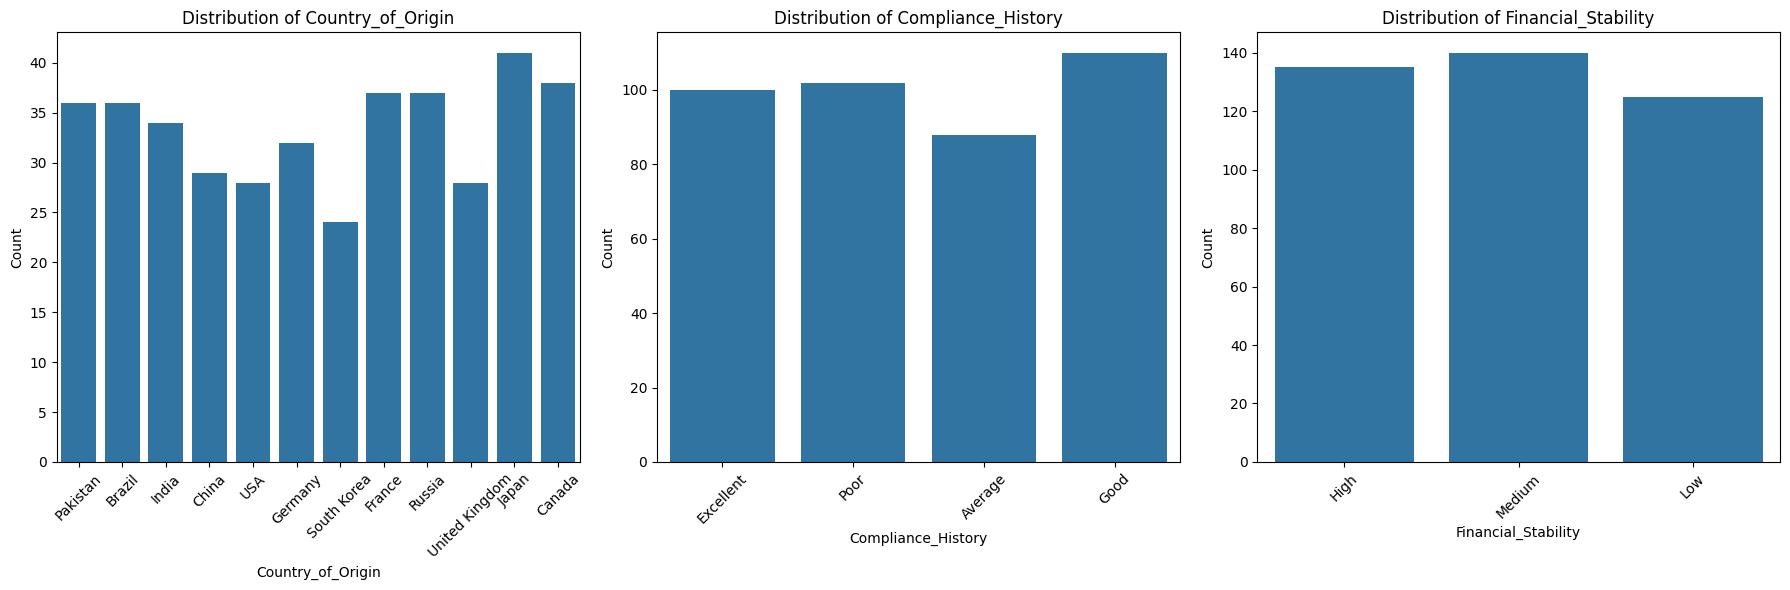

In [1392]:
# List of specific categorical features to visualize
selected_features = ['Country_of_Origin', 'Compliance_History', 'Financial_Stability']

# Create a single row with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(selected_features):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## **Numerical Features**

In [1393]:
# Numerical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Numerical Columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['Import_Frequency', 'Import_Quantity (kg)', 'HS Code',
       'Past_Violations'],
      dtype='object')


In [1394]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

Import_Frequency
63     10
57      8
37      8
108     7
60      7
       ..
64      1
109     1
131     1
116     1
134     1
Name: count, Length: 130, dtype: int64
 
Import_Quantity (kg)
6877      5
1851      5
7713      5
449044    4
4974      4
         ..
8619      1
14043     1
6959      1
18118     1
1895      1
Name: count, Length: 285, dtype: int64
 
HS Code
280110    39
282911    39
310210    39
282611    35
280130    35
283719    35
282619    34
280700    34
280120    29
284700    29
283711    28
280800    24
Name: count, dtype: int64
 
Past_Violations
4    77
1    73
3    71
0    66
5    57
2    56
Name: count, dtype: int64
 


In [1395]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:


## **Visualization of the Correlation HeatMap**

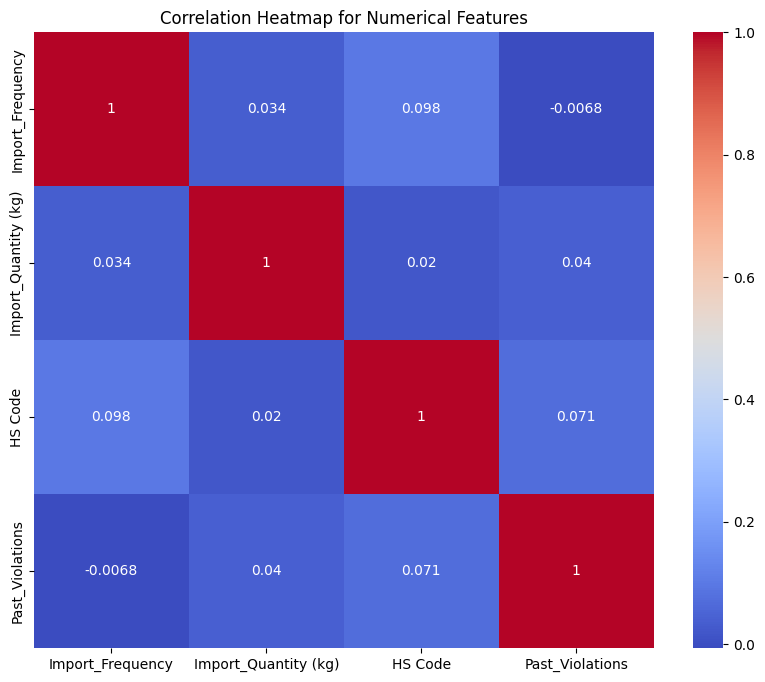

In [1396]:
# Plotting the Correlation HeatMap for the Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

## **Handling the Outliers**

## **Visualizing the Outliers**

In [1397]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

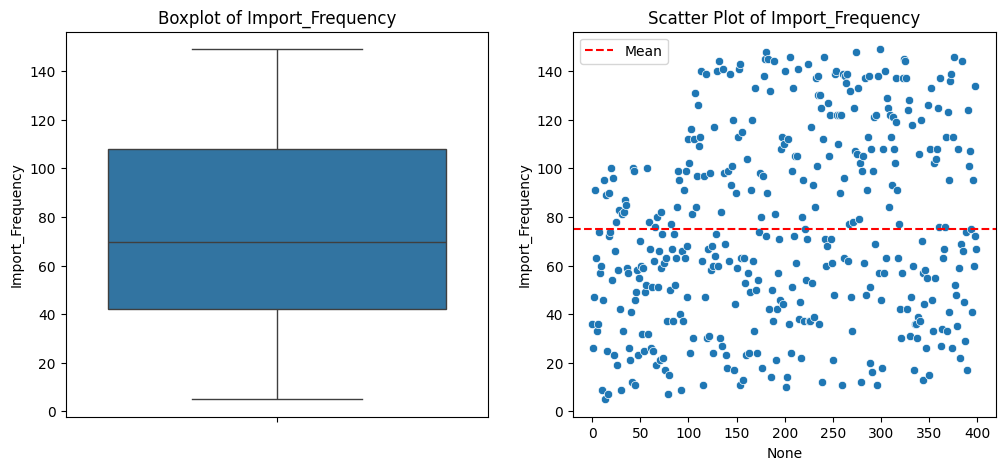

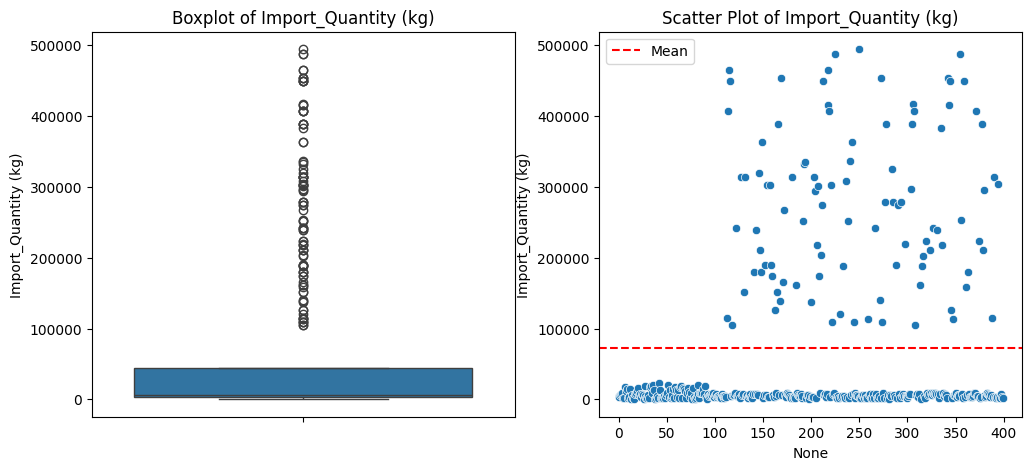

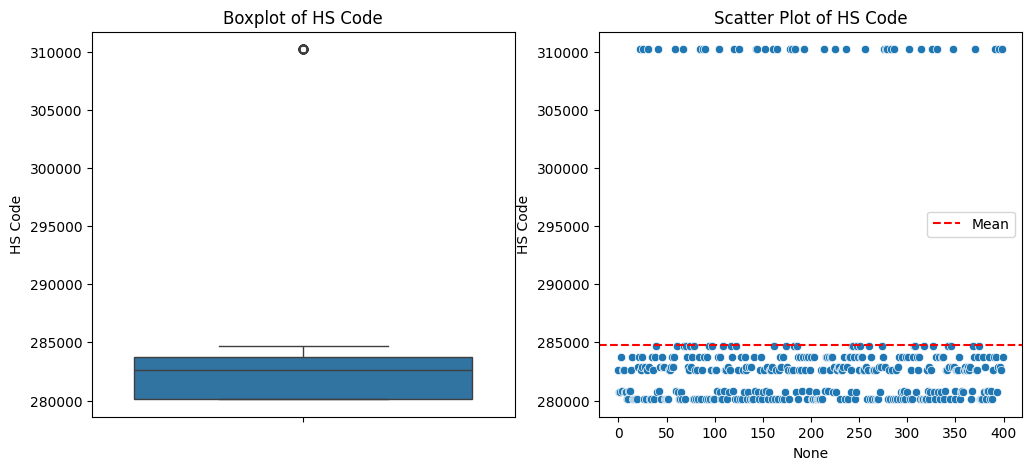

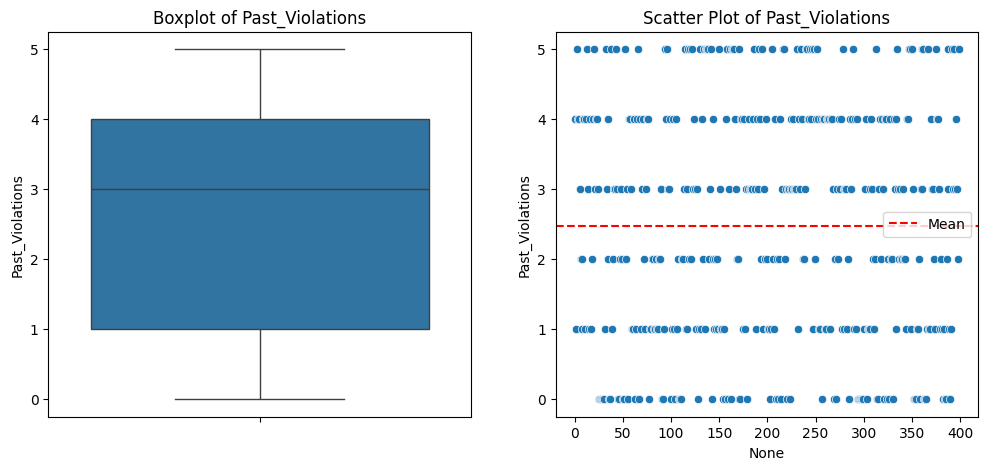

In [1398]:
# Function to visualize outliers using boxplot and scatter plot
def visualize_outliers(data, column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data.index, y=data[column])
    plt.axhline(data[column].mean(), color='red', linestyle='dashed', label='Mean')
    plt.title(f'Scatter Plot of {column}')
    plt.legend()

    plt.show()

# Visualize outliers for numerical columns
for col in numerical_features:
    visualize_outliers(pd.DataFrame(data), col)

In [1399]:
# Dictionary to store outliers for each numerical column
outlier_dict = {}

# Detect outliers for each numerical column using IQR
for col in numerical_features:
    outliers_iqr = detect_outliers_iqr(pd.DataFrame(data), col)
    outlier_dict[col] = outliers_iqr

# Display the detected outliers in a structured way
print("=" * 50)
print("          Outlier Detection using IQR")
print("=" * 50)

for col, outliers in outlier_dict.items():
    print(f"\n **{col}** - Outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.to_string(index=False))
    else:
        print(" No outliers detected.")
    print("-" * 50)

          Outlier Detection using IQR

 **Import_Frequency** - Outliers detected: 0
 No outliers detected.
--------------------------------------------------

 **Import_Quantity (kg)** - Outliers detected: 100
Importer_ID  Import_Frequency  Import_Quantity (kg)                                                                  Chemical_Name  HS Code Country_of_Origin                                  Importation_Description Compliance_History  Past_Violations Financial_Stability Risk_Category
     IMP114               140                114397                         Hydrogen peroxide, whether or not solidified with urea   280120    United Kingdom            Agriculture sector, soil nutrient enhancement               Good                3              Medium     Not Risky
     IMP115                62                406955                         Hydrogen peroxide, whether or not solidified with urea   282911             India                    Pharmaceutical & medical applications      

## **Visualizing the Distribution of the Numerical columns**

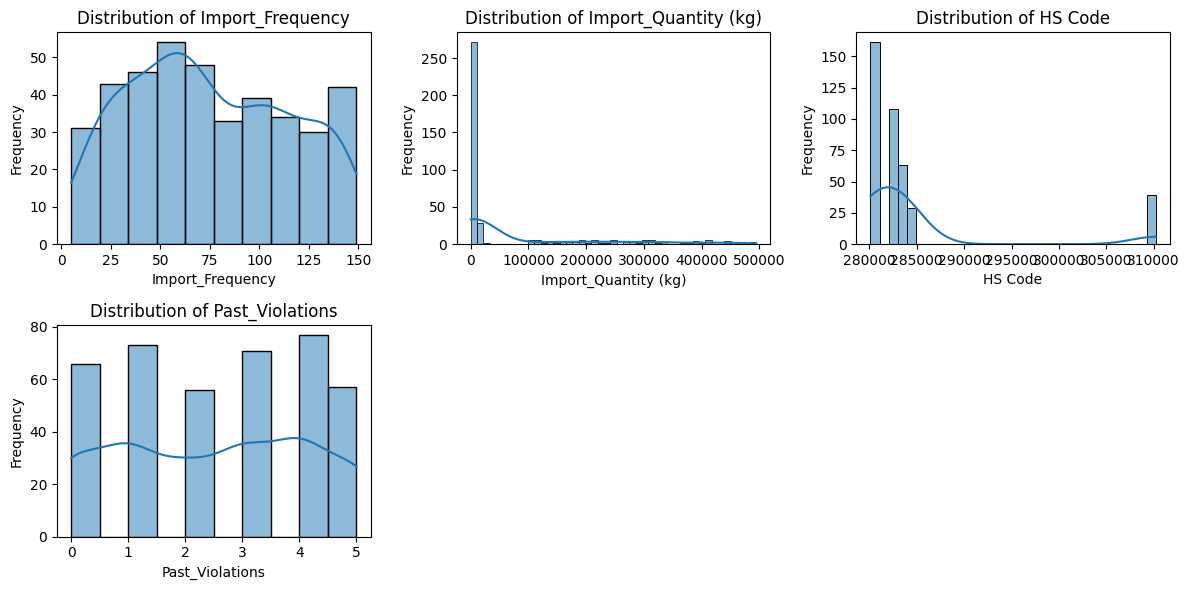

In [1400]:
# Visulaizing the Distribution of the Numerical Features
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

# Displaying the Plot
plt.show()

# **Data Preprocessing**

## **Data Cleaning**

In [1401]:
# Step 1: Removing whitespaces from the object type columns

# List of categorical columns
categorical_cols = ["Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability"]

# Remove leading and trailing whitespaces from object type columns
for col in categorical_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip()

In [1402]:
# Step 2: Dropping duplicate values
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [1403]:
# Display dataset information
print("\nDataset information after removing duplicates:")
data.info()


Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Importer_ID              400 non-null    object
 1   Import_Frequency         400 non-null    int64 
 2   Import_Quantity (kg)     400 non-null    int64 
 3   Chemical_Name            400 non-null    object
 4   HS Code                  400 non-null    int64 
 5   Country_of_Origin        400 non-null    object
 6   Importation_Description  400 non-null    object
 7   Compliance_History       400 non-null    object
 8   Past_Violations          400 non-null    int64 
 9   Financial_Stability      400 non-null    object
 10  Risk_Category            400 non-null    object
dtypes: int64(4), object(7)
memory usage: 34.5+ KB


## **Categorical Columns**

## **Data Encoding**

In [1404]:
# Step 3: Encoding the Categorical Columns
categorical_cols = ["Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability"]
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
categorical_data = encoder.fit_transform(data[categorical_cols])

# Convert to DataFrame
cat_data = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

## **Numerical Columns**

## **Handling the Outliers**

In [1405]:
# Step 4: Handling the Outliers in the Numerical Columns
for col in numerical_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

In [1406]:
# Dictionary to store outliers for each numerical column
outlier_dict = {}

# Detect outliers for each numerical column using IQR
for col in numerical_features:
    outliers_iqr = detect_outliers_iqr(pd.DataFrame(data), col)
    outlier_dict[col] = outliers_iqr

# Display the detected outliers in a structured way
print("=" * 50)
print("          Outlier Detection using IQR")
print("=" * 50)

for col, outliers in outlier_dict.items():
    print(f"\n **{col}** - Outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.to_string(index=False))
    else:
        print(" No outliers detected.")
    print("-" * 50)

          Outlier Detection using IQR

 **Import_Frequency** - Outliers detected: 0
 No outliers detected.
--------------------------------------------------

 **Import_Quantity (kg)** - Outliers detected: 100
Importer_ID  Import_Frequency  Import_Quantity (kg)                                                                  Chemical_Name  HS Code Country_of_Origin                                  Importation_Description Compliance_History  Past_Violations Financial_Stability Risk_Category
     IMP114             140.0            104700.375                         Hydrogen peroxide, whether or not solidified with urea 280120.0    United Kingdom            Agriculture sector, soil nutrient enhancement               Good              3.0              Medium     Not Risky
     IMP115              62.0            104700.375                         Hydrogen peroxide, whether or not solidified with urea 282911.0             India                    Pharmaceutical & medical applications      

In [1407]:
# Step 5: Scaling the numerical features
numerical_cols = ["Import_Frequency", "Past_Violations", "Import_Quantity (kg)", "HS Code"]
scaler = StandardScaler()
numerical_data = scaler.fit_transform(data[numerical_cols])
num_data = pd.DataFrame(numerical_data, columns=numerical_cols)

# **Target Variable**

In [1408]:
# Step 6: Encoding the Target variable (Risk_Category)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Risk_Category"])

In [1409]:
# Step 7: Combining processed features
X = pd.concat([num_data, cat_data], axis=1)

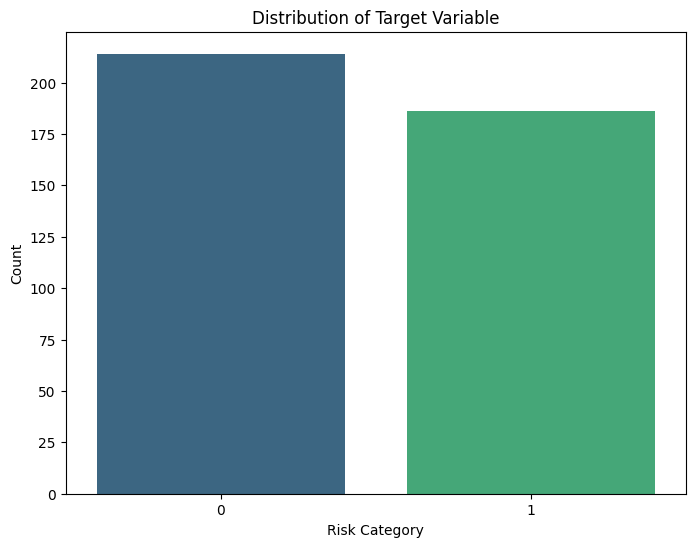

In [1410]:
# Visualizing the Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Target Variable")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

In [1411]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1412]:
# Visualizing the Target Variable
# plt.figure(figsize=(8, 6))
# sns.countplot(x='Risk_Category', data=data, palette='viridis')
# plt.title('Target Variable Distribution')
# plt.xlabel('Risk Category')
# plt.ylabel('Count')
# plt.show()

## **Handling the Imbalance Dataset**

In [1413]:
# Step 8: Handling the imbalance dataset

# Suppressing the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset size:", X.shape)
print("Resampled dataset size:", X_resampled.shape)


Original dataset size: (400, 42)
Resampled dataset size: (428, 42)


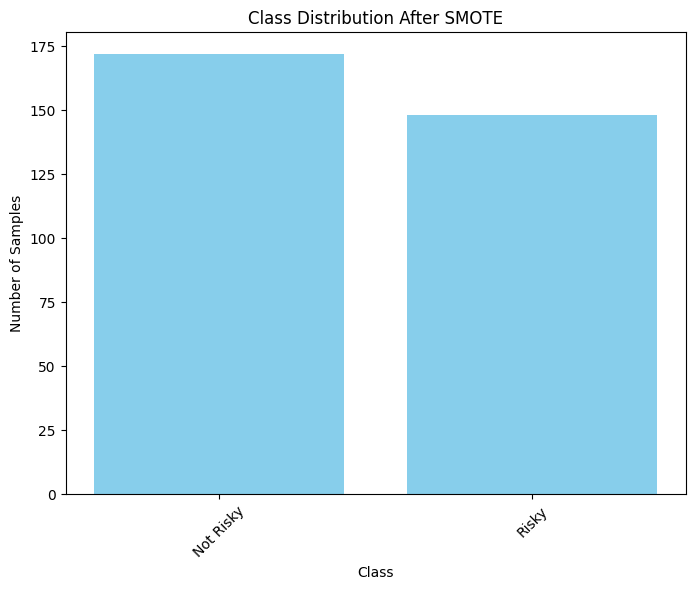

In [1414]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train is your target variable after applying SMOTE
unique, counts = np.unique(y_train, return_counts=True)

# Plotting the class distribution
plt.figure(figsize=(8, 6))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After SMOTE')
plt.xticks(unique, labels=label_encoder.inverse_transform(unique), rotation=45)
plt.show()

In [1415]:
# Displaying the dataset shape after applying the SMOTE
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

Shape of X_resampled: (428, 42)
Shape of y_resampled: (428,)


In [1416]:
# Displaying the Columns in X
print("Columns in X Resampled:")
print(X_resampled.columns)

Columns in X Resampled:
Index(['Import_Frequency', 'Past_Violations', 'Import_Quantity (kg)',
       'HS Code',
       'Chemical_Name_Chlorates and perchlorates; bromates and perbromates; iodates and periodates',
       'Chemical_Name_Chlorine',
       'Chemical_Name_Cyanides and cyanide oxides: Of sodium',
       'Chemical_Name_Cyanides and cyanide oxides: Other',
       'Chemical_Name_Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts',
       'Chemical_Name_Halides and halide oxides of non-metals',
       'Chemical_Name_Hydrogen peroxide, whether or not solidified with urea',
       'Chemical_Name_Iodine',
       'Chemical_Name_Mineral or chemical fertilizers, nitrogenous',
       'Chemical_Name_Nitric acid; sulphonitric acids',
       'Chemical_Name_Sulphuric acid; oleum', 'Country_of_Origin_Canada',
       'Country_of_Origin_China', 'Country_of_Origin_France',
       'Country_of_Origin_Germany', 'Country_of_Origin_India',
       'Country_of_Origin_Japan

In [1417]:
# Displaying the Dataset Information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Importer_ID              400 non-null    object 
 1   Import_Frequency         400 non-null    float64
 2   Import_Quantity (kg)     400 non-null    float64
 3   Chemical_Name            400 non-null    object 
 4   HS Code                  400 non-null    float64
 5   Country_of_Origin        400 non-null    object 
 6   Importation_Description  400 non-null    object 
 7   Compliance_History       400 non-null    object 
 8   Past_Violations          400 non-null    float64
 9   Financial_Stability      400 non-null    object 
 10  Risk_Category            400 non-null    object 
dtypes: float64(4), object(7)
memory usage: 34.5+ KB
None


In [1418]:
# Displaying the Dataset Information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Importer_ID              400 non-null    object 
 1   Import_Frequency         400 non-null    float64
 2   Import_Quantity (kg)     400 non-null    float64
 3   Chemical_Name            400 non-null    object 
 4   HS Code                  400 non-null    float64
 5   Country_of_Origin        400 non-null    object 
 6   Importation_Description  400 non-null    object 
 7   Compliance_History       400 non-null    object 
 8   Past_Violations          400 non-null    float64
 9   Financial_Stability      400 non-null    object 
 10  Risk_Category            400 non-null    object 
dtypes: float64(4), object(7)
memory usage: 34.5+ KB
None


In [1419]:
# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

# **Model Training**

## **Model Based on Gradient Boost**

In [1420]:
# Initialize and train Gradient Boosting Classifier
model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    warm_start=True,
    max_leaf_nodes=31,
    verbose=1
)

# Training the model on the training data
model.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3745          -0.0026            4.43s
         2           1.3603           0.0045            4.21s
         3           1.3514           0.0089            3.87s
         4           1.3437           0.0284            3.92s
         5           1.3346           0.0126            3.61s
         6           1.3218          -0.0022            3.31s
         7           1.3056          -0.0038            3.14s
         8           1.3019           0.0313            2.97s
         9           1.2939           0.0166            2.84s
        10           1.2800          -0.0078            2.75s
        20           1.1979           0.0003            2.24s


GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           max_leaf_nodes=31, n_estimators=1000,
                           n_iter_no_change=10, random_state=42, subsample=0.8,
                           verbose=1, warm_start=True)

In [1421]:
# Save the model and preprocessors
joblib.dump(model, "gradient_boost_classifier.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [1422]:
# Predictions
y_pred = model.predict(X_test)

In [1423]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5465
Classification Report:
              precision    recall  f1-score   support

   Not Risky       0.53      0.72      0.61        43
       Risky       0.57      0.37      0.45        43

    accuracy                           0.55        86
   macro avg       0.55      0.55      0.53        86
weighted avg       0.55      0.55      0.53        86

Confusion Matrix:
[[31 12]
 [27 16]]


# **Explainable AI - XAI**

/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


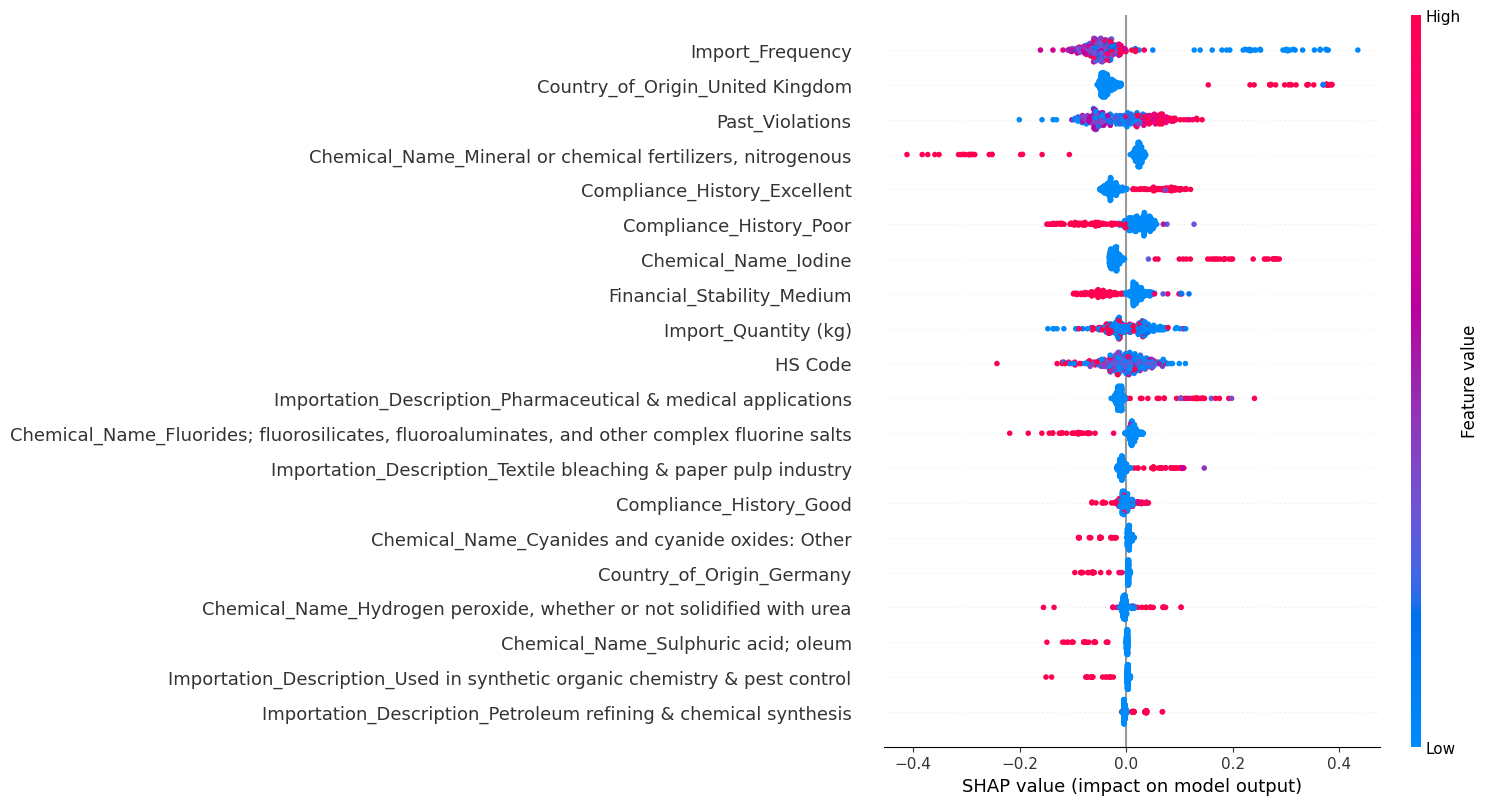

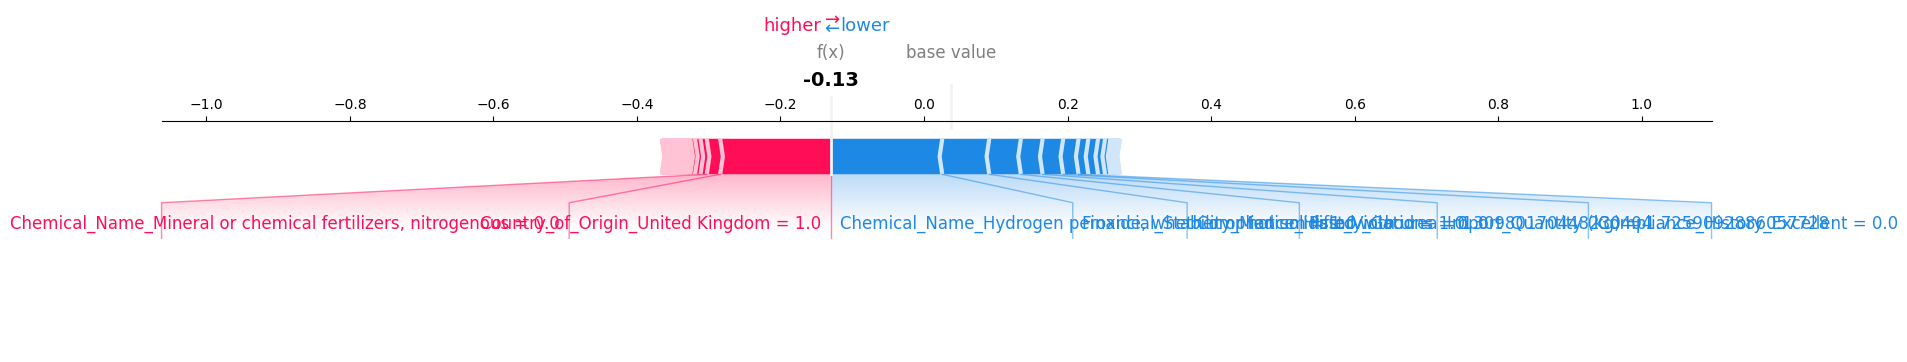

In [1424]:
# SHAP
# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train)

# SHAP Summary Plot (Global Feature Importance)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# SHAP Force Plot for a specific instance (Local Explanation)
shap.initjs()
shap.force_plot(shap_values[0], matplotlib=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


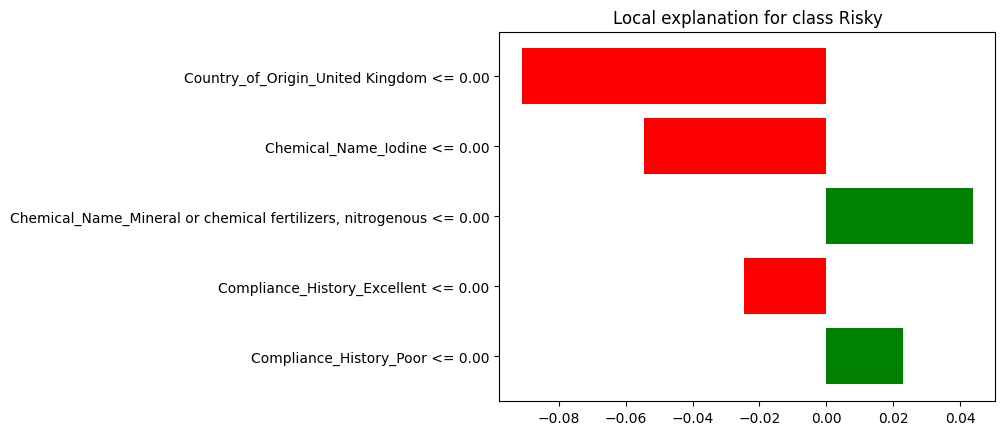

In [1425]:
# LIME
# Initialize LIME Explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    mode="classification",
    training_labels=y_train,
    feature_names=X_train.columns,
    class_names=label_encoder.classes_,
    discretize_continuous=True
)

# Choose an instance from the test set to explain
instance = X_test.iloc[0]

# Explain the instance with LIME
explanation = explainer_lime.explain_instance(instance.values, model.predict_proba, num_features=5)

# Plot the explanation for the instance
explanation.as_pyplot_figure()
plt.show()

# **Prediction**

In [1428]:
# Function to make predictions
def predict_risk_category(input_data):
    """
    input_data: dict containing feature values.
    """
    # Load trained model and preprocessors
    model = joblib.load("gradient_boost_classifier.pkl")
    encoder = joblib.load("encoder.pkl")
    scaler = joblib.load("scaler.pkl")
    label_encoder = joblib.load("label_encoder.pkl")

    # Convert input into DataFrame
    input_data = pd.DataFrame([input_data])

    # Process categorical features
    cat_features = encoder.transform(input_data[categorical_cols])
    cat_data = pd.DataFrame(cat_features, columns=encoder.get_feature_names_out(categorical_cols))

    # Process numerical features
    num_features = scaler.transform(input_data[numerical_cols])
    num_data = pd.DataFrame(num_features, columns=numerical_cols)

    # Combine processed features
    processed_input = pd.concat([num_data, cat_data], axis=1)

    # Make prediction
    prediction = model.predict(processed_input)
    predicted_category = label_encoder.inverse_transform(prediction)[0]
    return predicted_category

# Example usage
example_input = {
    "Import_Frequency": 82,
    "HS Code": 280110,
    "Past_Violations": 3,
    "Import_Quantity (kg)": 17618,
    "Chemical_Name": "Chlorine",
    "Country_of_Origin": "Pakistan",
    "Importation_Description": "Industrial water purification & disinfection",
    "Compliance_History": "Excellent",
    "Financial_Stability": "High"
}

predicted_category = predict_risk_category(example_input)
print(f"Predicted Risk Category: {predicted_category}")

Predicted Risk Category: Not Risky
